In [ ]:
import pandas as pd

**Loading Customer Data**

---



In [ ]:
customer=pd.read_csv('Customers.csv')

In [ ]:
customer.head(5)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
customer.shape

(200, 4)

In [ ]:
customer.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [ ]:
customer.duplicated().sum()

0

In [ ]:
customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [ ]:
customer.describe(include=[object])

,CustomerID,CustomerName,Region
count,200,200,200
unique,200,200,4
top,C0001,Lawrence Carroll,South America
freq,1,1,59


SPREAD OF CUSTOMER ACROSS DIFFERENT REGION

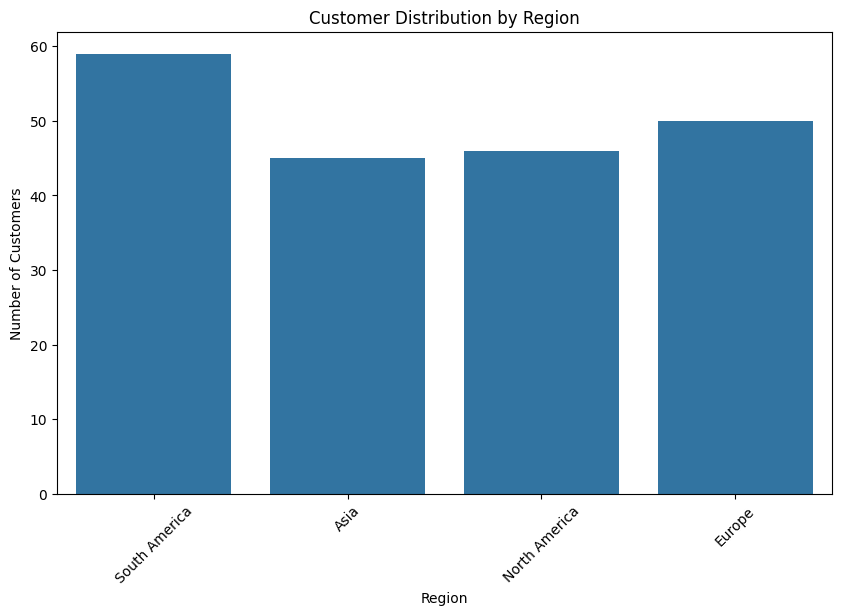

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x='Region', data=customer)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

CUSTOMER SIGNING UP OVER TIME

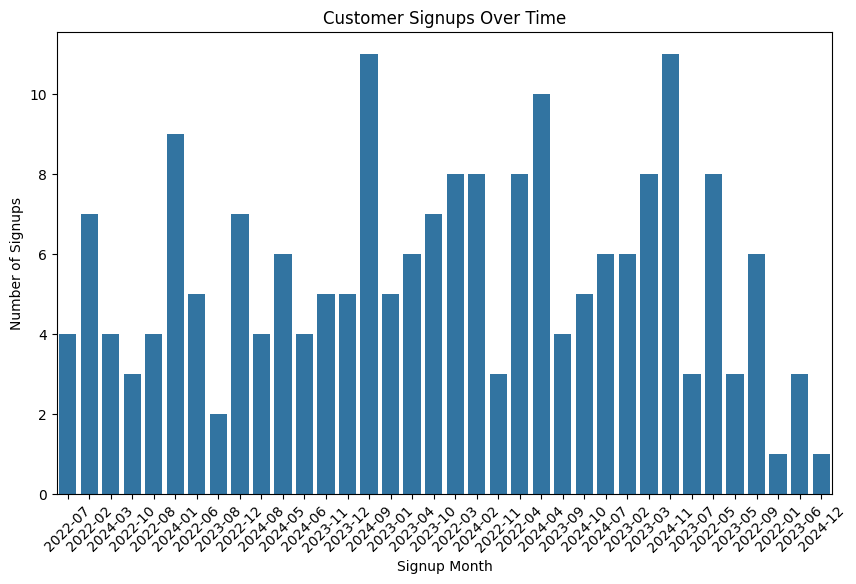

In [ ]:
customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])
customer['SignupMonth'] = customer['SignupDate'].dt.to_period('M')

plt.figure(figsize=(10,6))
sns.countplot(x='SignupMonth', data=customer)
plt.title('Customer Signups Over Time')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

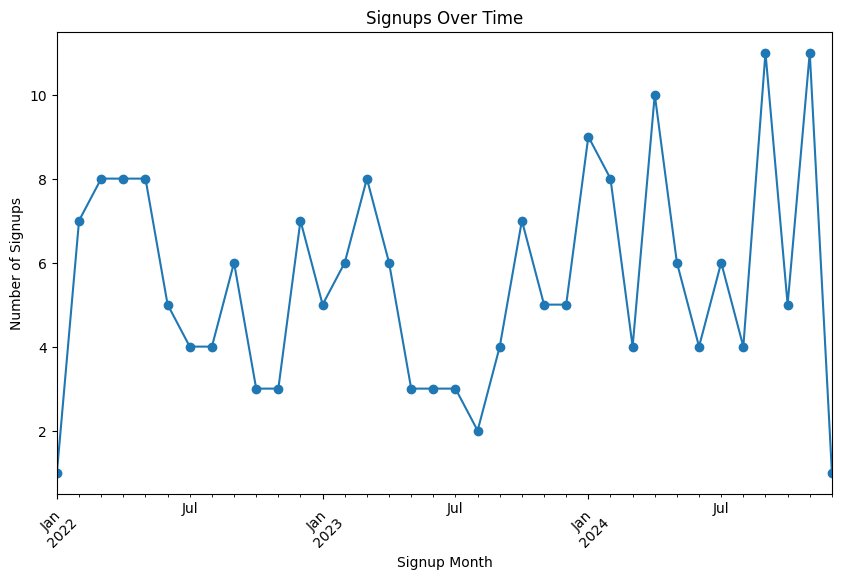

In [ ]:
signup_counts = customer.groupby(customer['SignupDate'].dt.to_period('M')).size()
plt.figure(figsize=(10,6))
signup_counts.plot(kind='line', marker='o')
plt.title('Signups Over Time')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

SIGNUPS BASED ON SEASONALITY

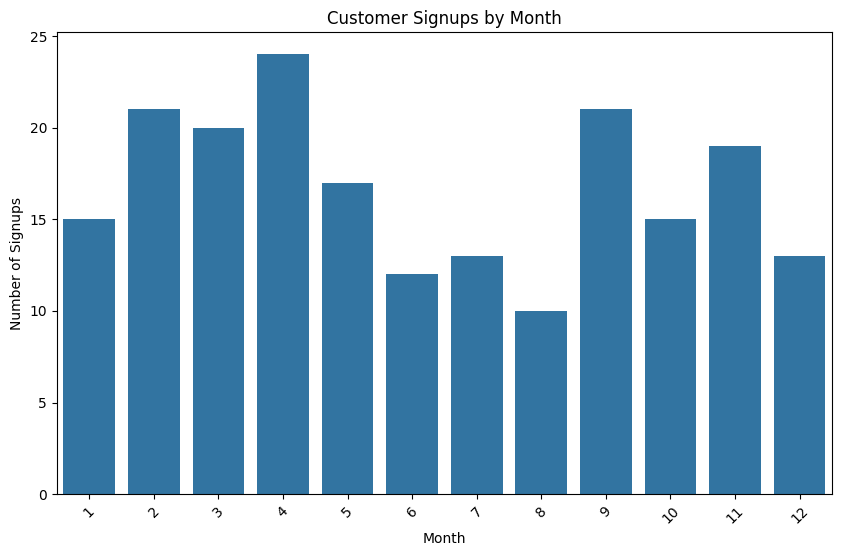

In [ ]:
customer['SignupMonth'] = customer['SignupDate'].dt.month
plt.figure(figsize=(10,6))
sns.countplot(x='SignupMonth', data=customer)
plt.title('Customer Signups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

HOW CUSTOMER BASE IS GROWING IN EACH REGION

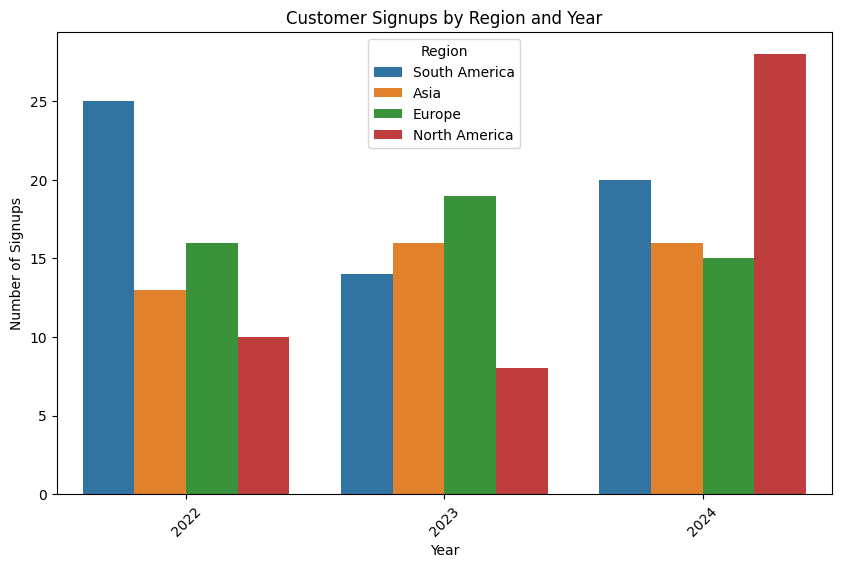

In [ ]:
customer['SignupYear'] = customer['SignupDate'].dt.year
plt.figure(figsize=(10,6))
sns.countplot(x='SignupYear', hue='Region', data=customer)
plt.title('Customer Signups by Region and Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

**Loading Products** **Data**



---





In [ ]:
product=pd.read_csv('Products.csv')

In [ ]:
product.head(5)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
product.shape

(100, 4)

Checking missing value

In [ ]:
product.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [ ]:
product.duplicated().sum()

0

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [ ]:
product.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


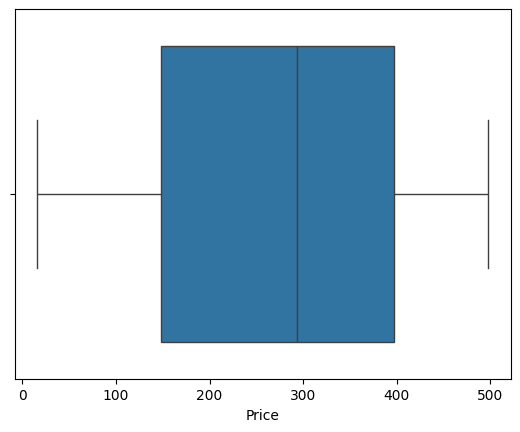

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the Price column
sns.boxplot(x=product['Price'])

# Show the plot
plt.show()


**VISUALIZATION FOR PRODUCT DATA**

---



frequency distribution of product prices, highlighting the range and concentration of prices.

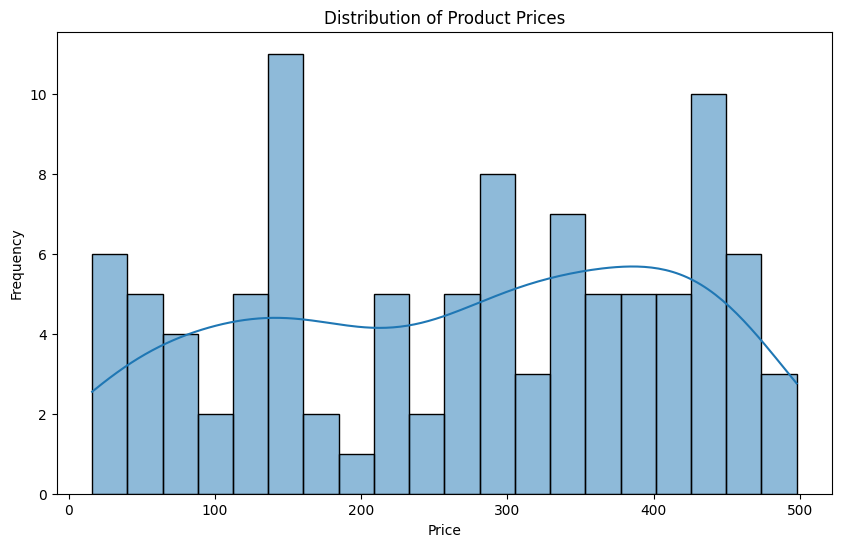

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(product['Price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

distribution of prices within each category, highlighting medians and outliers

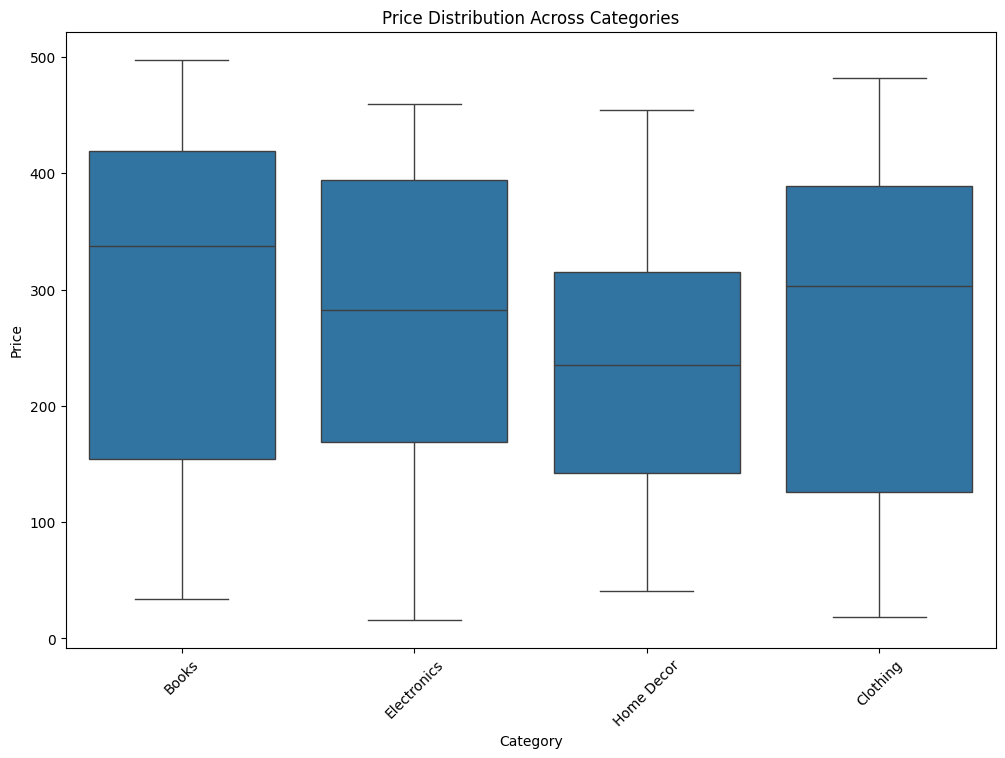

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Price', data=product)
plt.title('Price Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

distribution and probability density of prices within each category

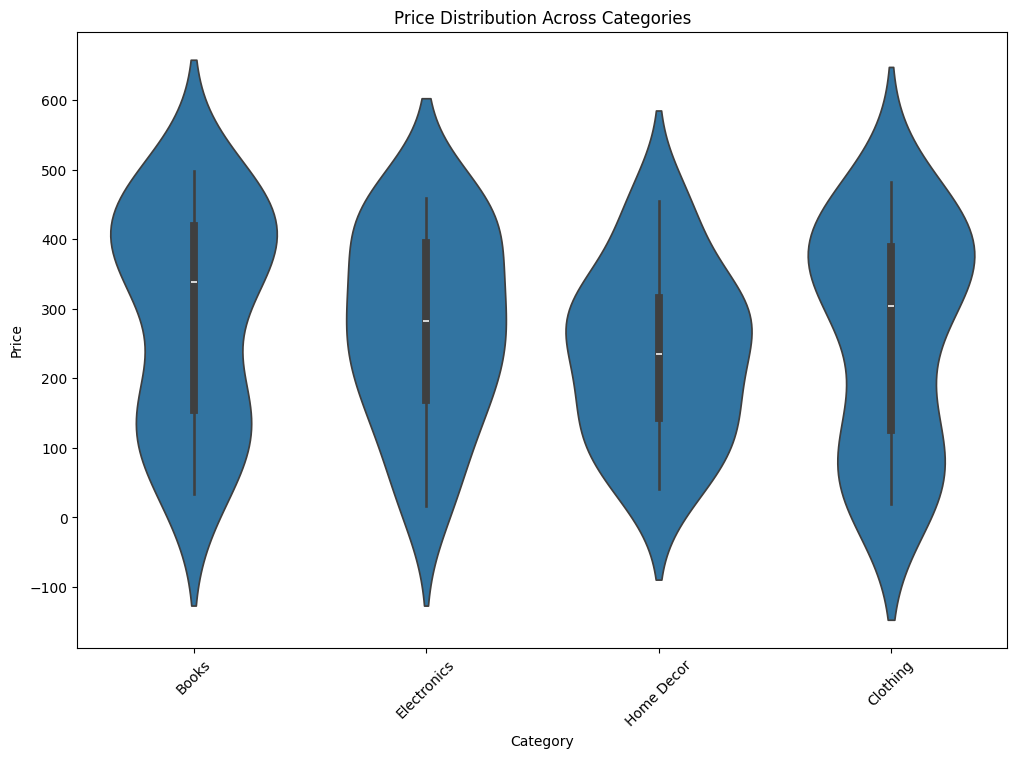

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Category', y='Price', data=product)
plt.title('Price Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

count of products in each category

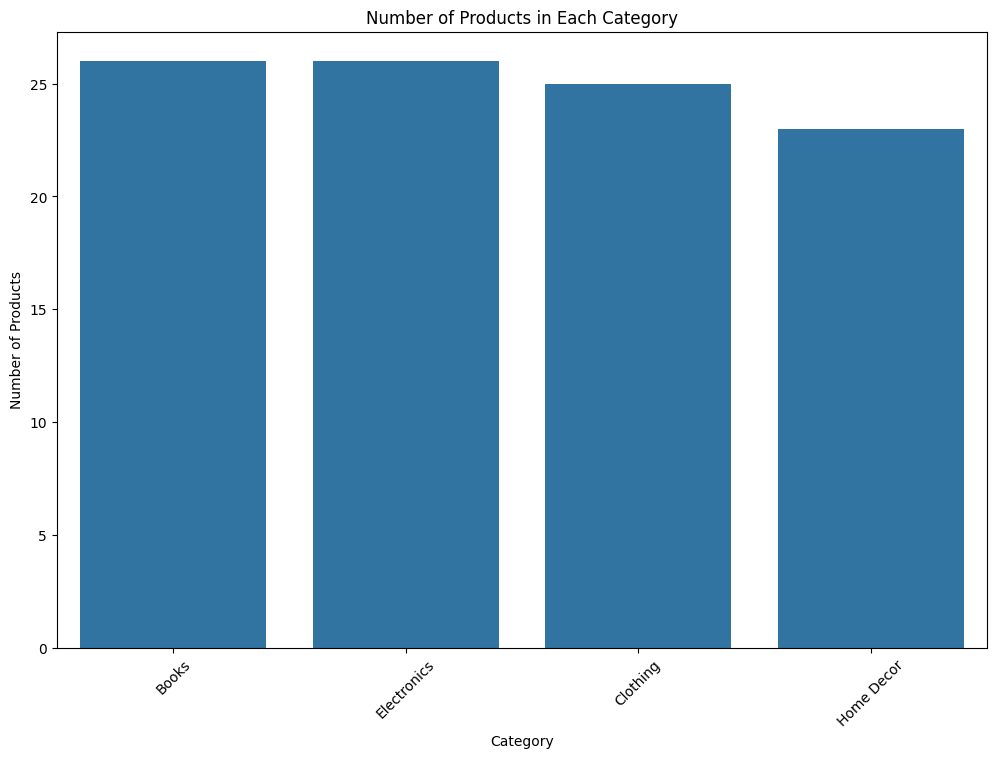

In [ ]:
category_counts = product['Category'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Products in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

**Loading Transaction data**

---



In [ ]:
trans=pd.read_csv('Transactions.csv')

In [ ]:
trans.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
trans.shape

(1000, 7)

Checking for missing values

In [ ]:
trans.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [ ]:
trans.duplicated().sum()

0

In [73]:
trans['TransactionDate'] = pd.to_datetime(trans['TransactionDate'])

TOTAL SALES BY PRODUCT

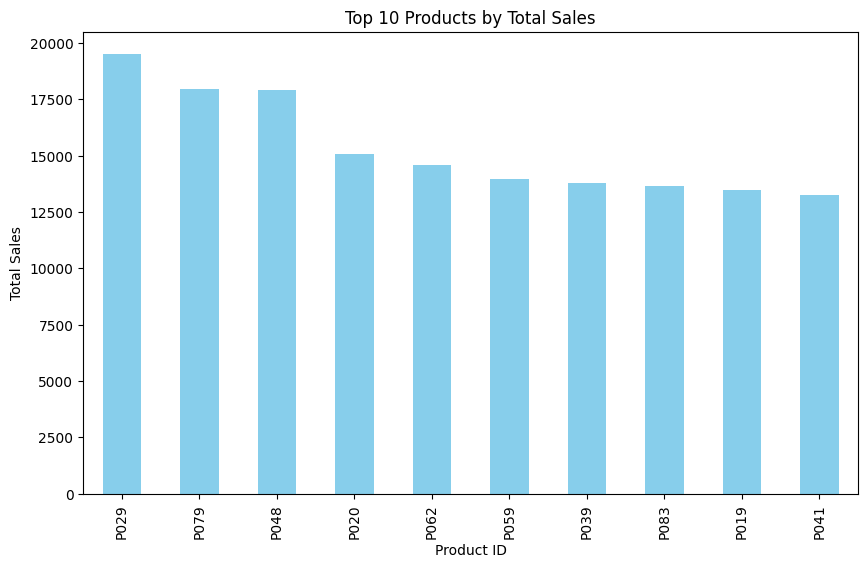

In [75]:
product_sales = trans.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)

product_sales.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()


QUANTITY SOLD DISTRIBUTION

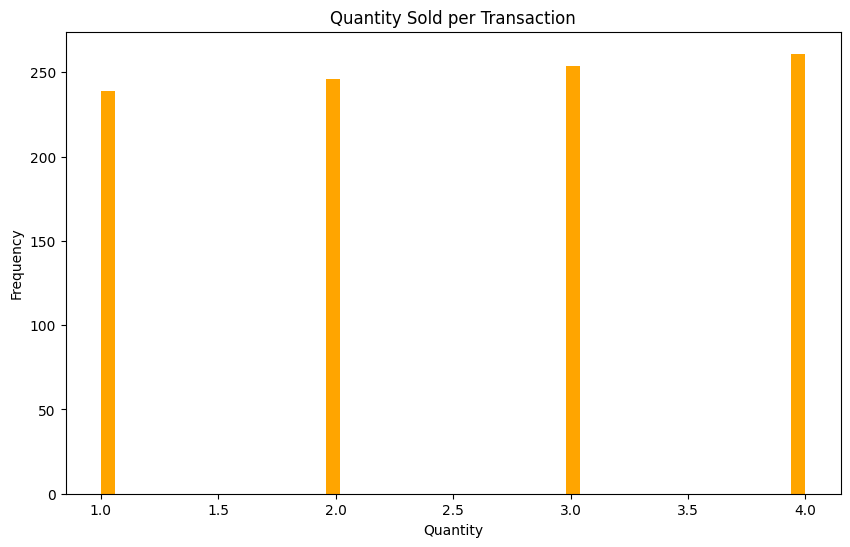

In [78]:
trans['Quantity'].plot(kind='hist', bins=50, figsize=(10,6), color='orange')
plt.title('Quantity Sold per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


AVERAGE TRANSACTION OVER TIME

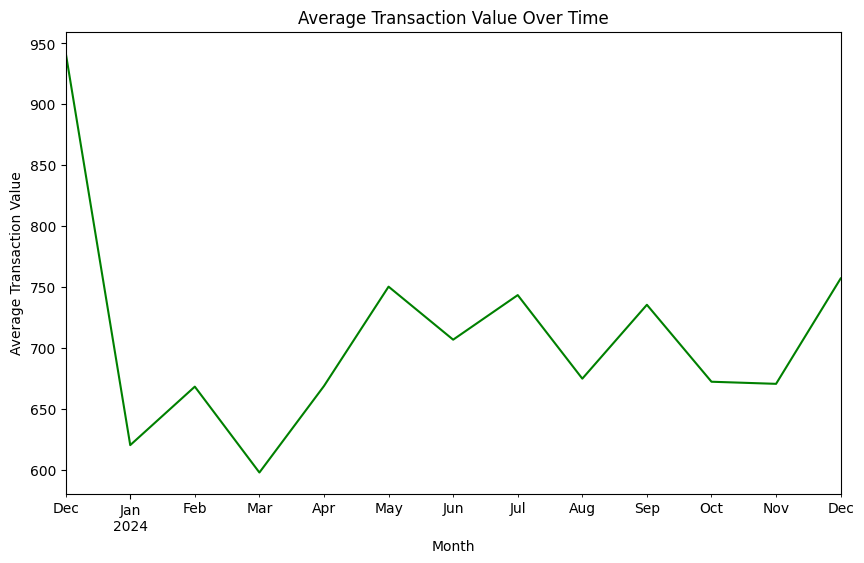

In [79]:
trans['TransactionDate'] = pd.to_datetime(trans['TransactionDate'])
trans['Month'] = trans['TransactionDate'].dt.to_period('M')

avg_transaction_value = trans.groupby('Month')['TotalValue'].mean()

avg_transaction_value.plot(kind='line', figsize=(10,6), color='green')
plt.title('Average Transaction Value Over Time')
plt.xlabel('Month')
plt.ylabel('Average Transaction Value')
plt.show()


Sales vs price

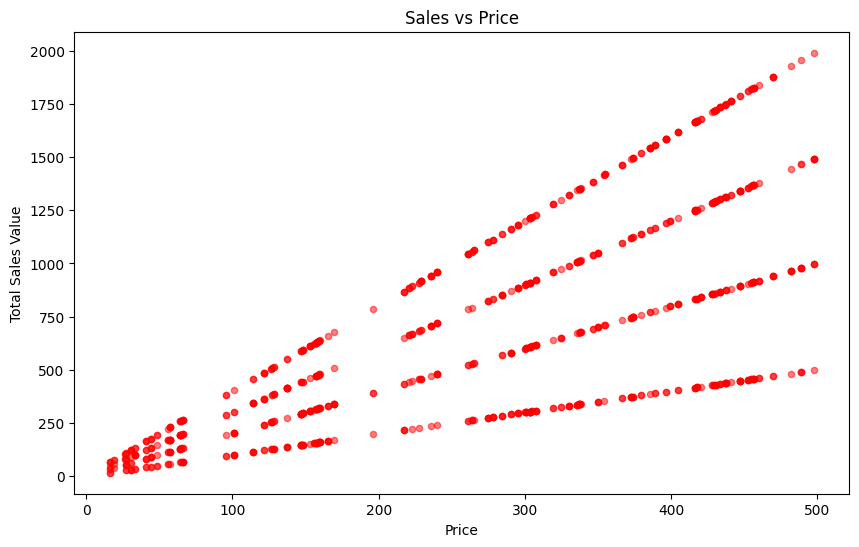

In [80]:
trans.plot(kind='scatter', x='Price', y='TotalValue', figsize=(10,6), alpha=0.5, color='red')
plt.title('Sales vs Price')
plt.xlabel('Price')
plt.ylabel('Total Sales Value')
plt.show()


TOP CUSTOMER BY TOTAL SPEND

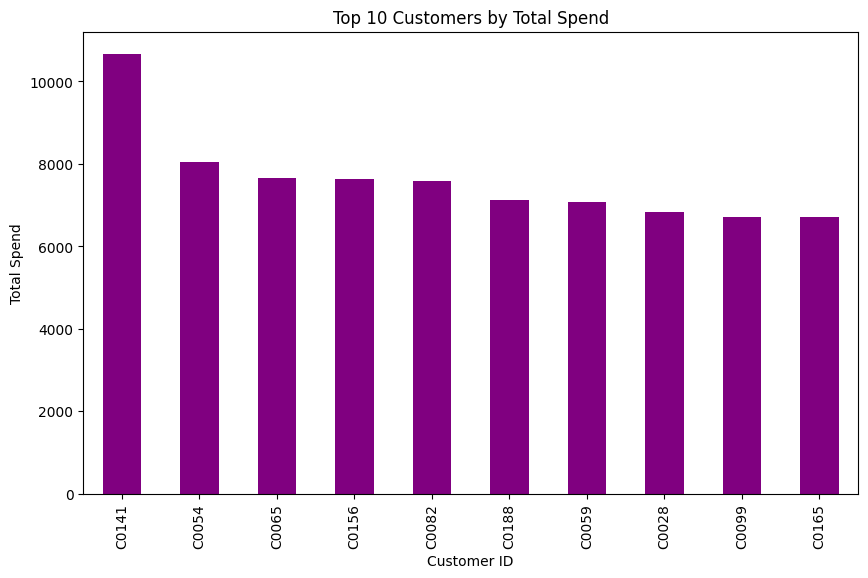

In [81]:
customer_spend = trans.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

customer_spend.plot(kind='bar', figsize=(10,6), color='purple')
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.show()
